In [5]:
import json
import os
import shutil

from src.LogicState import LogicState
from src.PWMWriter import PWMWriter
from src.Simulator import Simulator
from src.Plotter import Plotter

#config_file = "./configs/Serial_exact.json" 
config_file = "./configs/SIAFA1.json"

with open(config_file) as f:
    config = json.load(f)

In [6]:
# Check if the algorithm is valid and the resulting states are correct
LS = LogicState(config)
LS.calc_algorithm(plot_tt=True)
print("\n\n--------------- Logic States verified! ---------------\n")

#####################################
State Num: ['F[w1]']
a | b | c | w1|
--------------------
0 | 0 | 0 | 0
0 | 0 | 1 | 0
0 | 1 | 0 | 0
0 | 1 | 1 | 0
1 | 0 | 0 | 0
1 | 0 | 1 | 0
1 | 1 | 0 | 0
1 | 1 | 1 | 0
#####################################
#####################################
State Num: ['F[w1]', 'I[a,w1]']
a | b | c | w1|
--------------------
0 | 0 | 0 | 1
0 | 0 | 1 | 1
0 | 1 | 0 | 1
0 | 1 | 1 | 1
1 | 0 | 0 | 0
1 | 0 | 1 | 0
1 | 1 | 0 | 0
1 | 1 | 1 | 0
#####################################
#####################################
State Num: ['F[w1]', 'I[a,w1]', 'F[a]']
a | b | c | w1|
--------------------
0 | 0 | 0 | 1
0 | 0 | 1 | 1
0 | 1 | 0 | 1
0 | 1 | 1 | 1
0 | 0 | 0 | 0
0 | 0 | 1 | 0
0 | 1 | 0 | 0
0 | 1 | 1 | 0
#####################################
#####################################
State Num: ['F[w1]', 'I[a,w1]', 'F[a]', 'I[b,a]']
a | b | c | w1|
--------------------
1 | 0 | 0 | 1
1 | 0 | 1 | 1
0 | 1 | 0 | 1
0 | 1 | 1 | 1
1 | 0 | 0 | 0
1 | 0 | 1 | 0
0 | 1 | 0 | 0
0 | 1 | 1

In [7]:
# Automatically create PWM signals and store them in "PWM_output"
PWM = PWMWriter(config)
PWM.eval_algo()
print("\n\n--------------- PWM Signals created! ---------------\n")

# Copy the files to the folder of the corresponding topology (This removes the old files !)
for file in os.listdir(f"./Structures/{config["topology"]}"):
    if file.endswith(".csv"):
        if os.path.exists(f"./outputs/PWM_output/{file}"):
            os.remove(f"./Structures/{config["topology"]}/{file}")
            shutil.copy(f"./outputs/PWM_output/{file}", f"./Structures/{config["topology"]}/{file}")
        else:
            with open(f"./Structures/{config["topology"]}/{file}", "w") as f:
                if 'sw' in f.name.split('/')[-1]:
                    f.write(f"0,-100\n{config["cycle_time"]*(config["steps"]+1)},-100")
                else:
                    f.write(f"0,0\n{config["cycle_time"]*(config["steps"]+1)},0")

print(f"\n\n--------- Files of {config["topology"]} overwritten! --------\n")

File ./outputs/PWM_output/a.csv created!
File ./outputs/PWM_output/b.csv created!
File ./outputs/PWM_output/c.csv created!
File ./outputs/PWM_output/w1.csv created!
File ./outputs/PWM_output/a_sw.csv created!
File ./outputs/PWM_output/b_sw.csv created!
File ./outputs/PWM_output/c_sw.csv created!
File ./outputs/PWM_output/w1_sw.csv created!
Files written successfully


--------------- PWM Signals created! ---------------



--------- Files of Serial overwritten! --------



100%|██████████| 8/8 [01:13<00:00,  9.18s/it]


Average energy consumption: 1.4509784999999998e-09


100%|██████████| 8/8 [01:13<00:00,  9.21s/it]


Average energy consumption: 1.4509785e-09


100%|██████████| 8/8 [01:13<00:00,  9.21s/it]


Average energy consumption: 1.4509785e-09


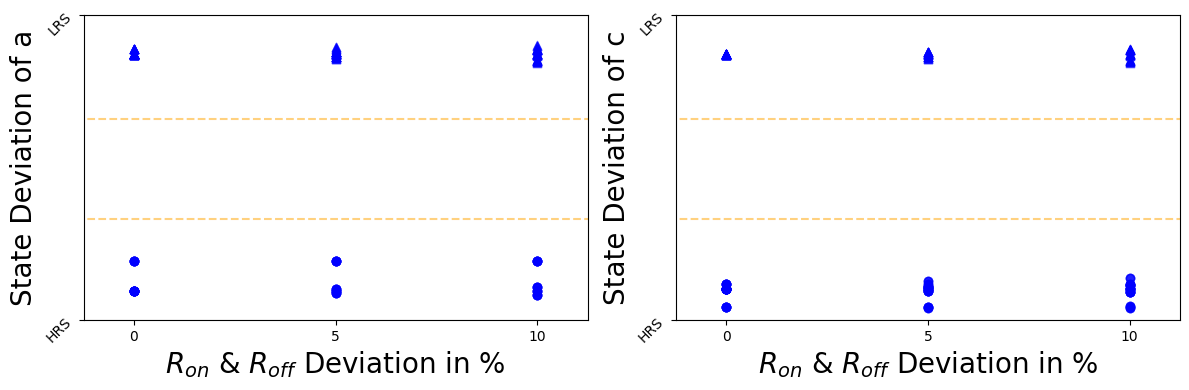

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

<Figure size 500x500 with 0 Axes>

In [8]:
PLT = Plotter(config)
# recompute has to be set True if the deviation range has not be computed yet

# Plot the resulting output states over increasing deviation ranges
PLT.plot_deviation_scatter(max_dev=50, recompute=True)
PLT.plot_deviation_range(max_dev=50, recompute=False)
# TODO: Fix for other topologies
# Plot different waveforms of input combinations and deviations
PLT.plot_waveforms_with_deviation(comb='011', dev=20, recompute=False)